In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import requests

In [75]:
url="https://raw.githubusercontent.com/AbisolaOlakanmi/Teamhousing/ExtractionandCleaning/Resources/Vacancy%20Rate%20Concat.csv"
url_requests=requests.get(url).content
avg_vacancyRate_df=pd.read_csv(io.StringIO(url_requests.decode('utf-8')))
avg_vacancyRate_df = avg_vacancyRate_df.rename(columns={'Bachelor ': 'Bachelor','Dwelling Type ': 'Dwelling Type','Total ': 'Total'})
avg_vacancyRate_df.head()

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
0,Nfld.Lab.,St. John's,St. John's East,St. John's East,Row,0.0,0.0,0.0,0.0,0.0,2018
1,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,0.0,3.9,6.4,5.2,5.6,2018
2,Nfld.Lab.,St. John's,St. John's West,St. John's West,Row,0.0,0.0,0.0,0.0,1.5,2018
3,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,3.9,6.1,6.1,0.0,6.2,2018
4,Nfld.Lab.,St. John's,Remainder of CMA,Remainder of CMA,Row,0.0,0.0,0.0,0.0,0.0,2018


In [78]:
avg_vacancyRate_trend_df = avg_vacancyRate_df[['Province','Year','Total']]
provinces_for_trend = ["Alta", "B.C.","Ont.","Que","Sask."]
avg_vacancyRate_trend_df = avg_vacancyRate_trend_df[(avg_vacancyRate_trend_df['Province'].isin(provinces_for_trend))]
avg_vacancyRate_trend_df = pd.pivot_table(avg_vacancyRate_trend_df, index='Year', columns='Province', values='Total', aggfunc='mean', fill_value=0).reset_index()
avg_vacancyRate_trend_df.columns = ["Year", "Alta", "B.C.", "Ont.","Que","Sask."]
avg_vacancyRate_trend_df.head()

,Year,Alta,B.C.,Ont.,Que,Sask.
0,2018,2.908537,0.548571,0.805187,0.683668,4.197297
1,2019,2.832927,0.590000,0.840346,0.464322,3.317568
2,2020,2.805285,1.145238,1.096254,0.559296,3.351351
3,2021,2.645935,0.577143,1.007349,0.412563,2.710811
4,2022,1.249187,0.538571,0.611960,0.316080,1.577027


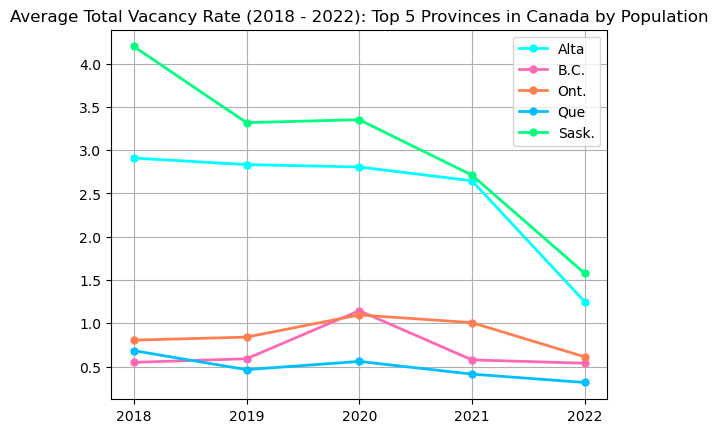

In [117]:
#plot Avg Vacancy Rate Trend:
plt.plot( 'Year', 'Alta', data=avg_vacancyRate_trend_df, marker='o', markerfacecolor='cyan', markersize=5, color='cyan', linewidth=2)
plt.plot( 'Year', 'B.C.', data=avg_vacancyRate_trend_df, marker='o', markerfacecolor='hotpink', markersize=5, color='hotpink', linewidth=2)

plt.plot( 'Year', 'Ont.', data=avg_vacancyRate_trend_df, marker='o', markerfacecolor='coral', markersize=5, color='coral', linewidth=2)
plt.plot( 'Year', 'Que', data=avg_vacancyRate_trend_df, marker='o', markerfacecolor='deepskyblue', markersize=5, color='deepskyblue', linewidth=2)
plt.plot( 'Year', 'Sask.', data=avg_vacancyRate_trend_df, marker='o', markerfacecolor='springgreen', markersize=5, color='springgreen', linewidth=2)

plt.xticks([2018,2019,2020,2021,2022])

plt.title("Average Total Vacancy Rate (2018 - 2022): Top 5 Provinces in Canada by Population")
plt.grid()
plt.legend()

plt.show()

In [95]:
avg_vacancyRateDT_trend_df = avg_vacancyRate_df[['Province','Bachelor','1 Bedroom','2 Bedroom','3 Bedroom +','Year']]
avg_vacancyRateDT_trend_df = avg_vacancyRateDT_trend_df[(avg_vacancyRateDT_trend_df['Province']=='Alta') |
                                                        (avg_vacancyRateDT_trend_df['Province']=='B.C.') | 
                                                        (avg_vacancyRateDT_trend_df['Province']=='Ont.') | 
                                                        (avg_vacancyRateDT_trend_df['Province']=='Que') | 
                                                        (avg_vacancyRateDT_trend_df['Province']=='Sask.')]
avg_vacancyRateDT_trend_df = pd.pivot_table(avg_vacancyRateDT_trend_df, index='Year', values=['Bachelor','1 Bedroom','2 Bedroom','3 Bedroom +'], aggfunc='mean', fill_value=0).reset_index()
avg_vacancyRateDT_trend_df.head()

,Year,1 Bedroom,2 Bedroom,3 Bedroom +,Bachelor
0,2018,0.809125,1.023305,0.516708,0.302219
1,2019,0.809741,0.891554,0.431504,0.346547
2,2020,1.018126,1.103083,0.452343,0.443958
3,2021,0.897719,0.892417,0.434895,0.361036
4,2022,0.510296,0.510296,0.213625,0.215598


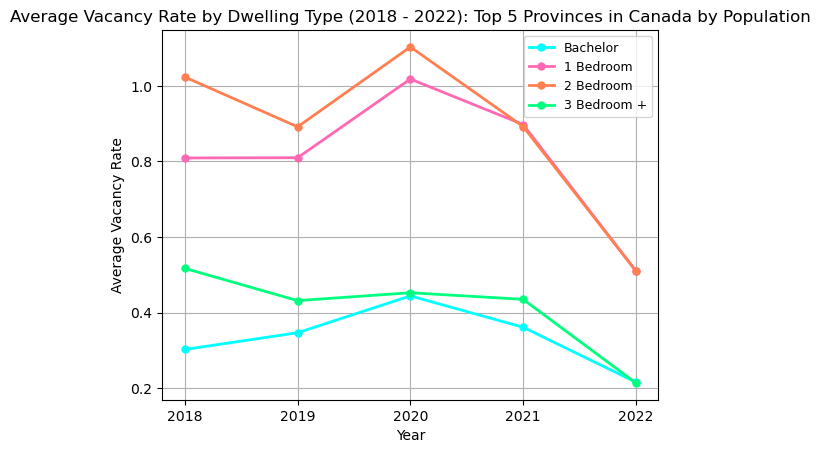

In [116]:
#plot Avg Vacancy Rate by Dwelling Type Trend:
plt.plot( 'Year', 'Bachelor', data=avg_vacancyRateDT_trend_df, marker='o', markerfacecolor='cyan', markersize=5, color='cyan', linewidth=2)
plt.plot( 'Year', '1 Bedroom', data=avg_vacancyRateDT_trend_df, marker='o', markerfacecolor='hotpink', markersize=5, color='hotpink', linewidth=2)

plt.plot( 'Year', '2 Bedroom', data=avg_vacancyRateDT_trend_df, marker='o', markerfacecolor='coral', markersize=5, color='coral', linewidth=2)
plt.plot( 'Year', '3 Bedroom +', data=avg_vacancyRateDT_trend_df, marker='o', markerfacecolor='springgreen', markersize=5, color='springgreen', linewidth=2)

plt.xticks([2018,2019,2020,2021,2022])

plt.xlabel('Year')
plt.ylabel('Average Vacancy Rate')

plt.title("Average Vacancy Rate by Dwelling Type (2018 - 2022): Top 5 Provinces in Canada by Population")
plt.grid()
plt.legend(loc='upper right', fontsize="9",)


plt.show()